## Import necessary modules

In [34]:
import torch
from torch.utils.data import Dataset
import torchvision

import os
import random

import cv2

import numpy as np

import matplotlib.pyplot as plt

## Custom Dataset

In [41]:
class CustomDataset(Dataset):
    def __init__(self, train_directory):
        self.path = train_directory
        self.file_names = list(os.listdir(train_directory))
        self.image_names = [file_name for file_name in self.file_names if file_name[-1] == 'g']
        self.label_names = [img_name.split('.jpg')[0] + '.txt' for img_name in self.image_names]
    def __len__(self):
        return len(self.image_names)
    def __getitem__(self, index):
        img_name, label_name = self.image_names[index], self.label_names[index]

        img = torchvision.io.read_image(self.path + img_name)
        
        try:
            with open(self.path + label_name, 'r') as f:
                unprocessed_labels = f.readlines()
        
            labels = [tuple(map(eval, line[:-1].split(' '))) for line in unprocessed_labels]
        except:
            labels = []
        
        return img, labels

## Drawing the Bounding Box

In [63]:
def draw_bb(input_img:np.ndarray, label):
    new_img = input_img.numpy()
    width, height = new_img.shape[:-1]
    for crack in label:
        c, c_x, c_y, w, h = crack

        new_img = cv2.rectangle(new_img, (int((c_x - w / 2) * width), int((c_y - h / 2) * height)),(int((c_x + w / 2) * width), int((c_y + h / 2) * height)), (150, 200, 255), 4)
    
    return new_img

## Testing the Dataset

[(0, 0.5, 0.4140625, 1.0, 0.828125)]


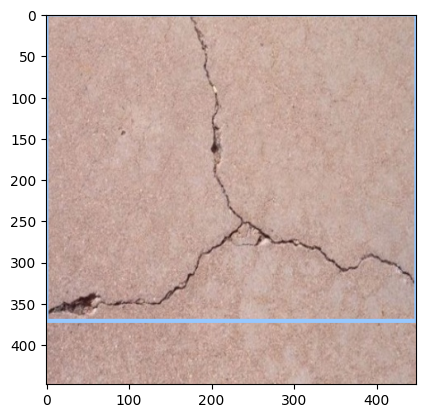

In [64]:
dataset = CustomDataset(r'../train/')

index = random.randint(0, len(dataset) - 1)

img, label = dataset[index]

processed_img = torch.moveaxis(img, 0, 2)

plt.imshow(draw_bb(processed_img, label))
print(label)

In [46]:
classes = [data[1][0] for data in dataset if len(data[1])]